In [1]:
import translators as ts
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

#### TO-DO ####
1) Add Similarity Metrics: Levenshtein Distance and cosine_similarity_tf-idf / cosine similarity with the embeddings I plan to use

In [3]:
df = pd.read_csv('Parallel Training Corpus (Sample).csv', encoding='cp1252', header=None)
df.columns = ['Cajun_French', 'English']
df.head(10).style.hide(axis='index')

Cajun_French,English
Allons boire un coup,Let’s go have a drink
"Oh, mes amis","Oh, my friends"
Allons tous boire un coup,Let’s all go have a drink
Vingt-cinq sous la demi,Twenty–five cents for a half quart
Cinquante sous le quart,Fifty cents for a quart
Un piaster et demi paye le demi-gallon,One dollar fifty pays for a half gallon
"Oh mes amis, chers","Oh, my dear friends"
Ça coute rien du tout,It costs nothing at all
"Oh, moi, je m’en fou pas mal","Oh, I don’t care"
allons boire un ‘tit coup quand même,let’s go drink anyway!


In [4]:
# Function to check for invalid characters
def count_invalid_characters(text):
    return sum(1 for char in text if not char.isprintable())

# Iterate over each row in the DataFrame
eng_invalid_count = 0
cfr_invalid_count = 0
for index, row in df.iterrows():
    eng_invalid_count += count_invalid_characters(row['English'])
    cfr_invalid_count += count_invalid_characters(row['Cajun_French'])
    if eng_invalid_count > 0 or cfr_invalid_count > 0:
        print(f"Row {index} contains invalid characters")

print(f"Total invalid characters in 'English' column: {eng_invalid_count}")
print(f"Total invalid characters in 'Cajun_French' column: {cfr_invalid_count}")
df.sort_values(by='English', key=lambda x: x.str.len()).head().style.hide(axis='index')

Total invalid characters in 'English' column: 0
Total invalid characters in 'Cajun_French' column: 0


Cajun_French,English
Hey Bébé,"Hey Baby,"
Moi jai pleuré,"Me, I cried"
"Mon, j’ai jonglé","Me, I thought"
"Mon, j’suis gone,",I’m gone away
Ça fait de la peine pour moi!,That hurts me!


In [5]:
total_chars_english = df['English'].str.len().sum()
total_chars_cajun_french = df['Cajun_French'].str.len().sum()

print(f'Total characters in English: {total_chars_english}')
print(f'Total characters in Cajun French: {total_chars_cajun_french}')
df.sort_values(by='English', key=lambda x: x.str.len()).tail().style.hide(axis='index')

Total characters in English: 6487
Total characters in Cajun French: 7184


Cajun_French,English
Si que tu te maries avec une villaine fille t’es dans le grand danger faudra tu vies ta vie avec,"If you marry an ugly girl, you’re in big trouble- you have to life your life with her."
"Elle me reponde, “Mon neg, c’est pour ça je querelle parce que je te vois tout les temps parti”","She answers, “It’s for this that I’m always arguing because I see you’re always gone.”"
"Quoi c’est tu veux je te cuis, ouais, mon bon vieux mari, qui est le meilleur buveur du pays?","What do you want me to cook you, my good old husband, who is the best drinker in the land?"
"Uh... Laisses-mon voir: cinque douzaines d’oufs, un demi-gallon de couche couche, et deux livres du pain perdu.","Uh, let me see. 5 dozen eggs, a half gallon of couche couche, and two pounds of pain perdu."
Mais enterres-mon dans le coin de la court et de temps en temps passes-moi une ‘tite bouteille de whiskey pour boire avec le vieux diable.,Bury me in the corner of the yard and every now and then pass me a little bottle of whiskey to drink with the old devil.


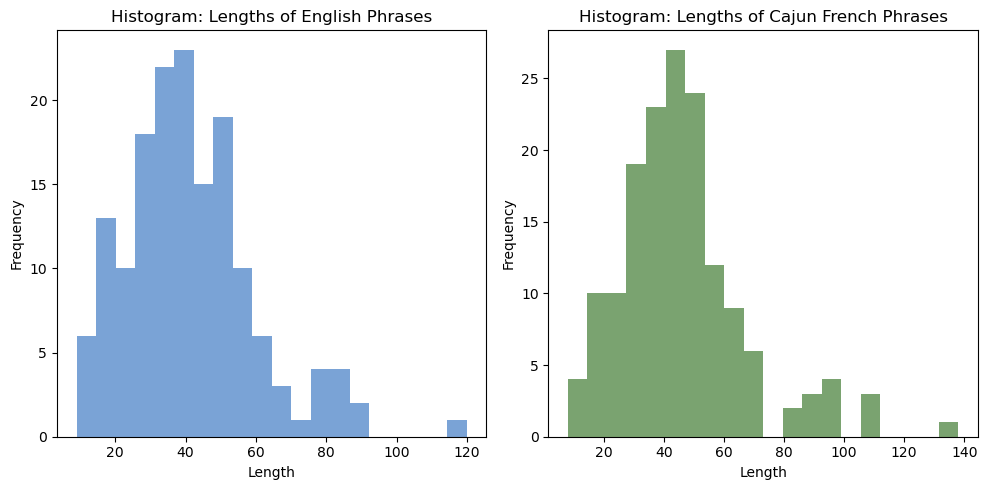

In [6]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(df['English'].str.len(), bins=20, color='#2266BB', alpha=0.6)
plt.title('Histogram: Lengths of English Phrases')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['Cajun_French'].str.len(), bins=20, color='#226611', alpha=0.6)
plt.title('Histogram: Lengths of Cajun French Phrases')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [7]:
def standard_french_translation(text):
    return ts.translate_text(text, translator='google', to_language='fr', from_language='en')

def attempt_english_translation(text):
    return ts.translate_text(text, translator='google', to_language='en', from_language='fr')

tqdm.pandas()
df['Standard_French'] = df['English'].progress_apply(standard_french_translation)
df['Translated_English'] = df['Cajun_French'].progress_apply(attempt_english_translation)

100%|██████████| 157/157 [02:40<00:00,  1.02s/it]


In [9]:
df.sample(10).style.hide(axis='index')

Cajun_French,English,Standard_French,Translated_English
Pour paraître la plus belle aux yeux des marriés,To seem the most beautiful to the young married ones.,Pour sembler les plus beaux aux jeunes mariés.,To appear the most beautiful in the eyes of the bride and groom
J’vas boire ca proche toute ma vie,I’m going to drink almost all of my life,Je vais boire presque toute ma vie,I live to drink it close to my whole life
Whiskey c’est mon ami.,Whiskey is my friend,Le whisky est mon ami,Whiskey is my friend.
Ça vaut les difficultés souvent elles ne les ont pas.,It’s worth the troubles they often don’t have.,Cela vaut les problèmes qu'ils n'ont souvent pas.,It is worth the difficulties often they do not have them.
Tu ne sauras jamais.,You’ll never know.,Vous ne le saurez jamais.,You will never know.
"Mais chère , j’suis parti au bar. Mon, j’vas me saouler.","Well dear, I’m gone to the bar. I’m going to get drunk.","Eh bien mon cher, je suis allé au bar. Je vais me saouler.","But dear, I went to the bar. My, I’m going to get drunk."
"Hey, chère, Aujourd’hui J’suis condamné à rouler","Hey, dear, Today I’m condemned to ramble","Hé, mon cher, aujourd'hui, je suis condamné à la divagation","Hey, dear, today I am condemned to ride"
"Ayoù ‘ce-que t’es parti, ouais, mon bon vieux mari, qui est le meilleur buveur du pays?","Where have you gone my good old husband, who is the best drinker in the land?","Où êtes-vous allé mon bon vieux mari, qui est le meilleur buveur du pays?","Ayoù ‘This you left, yeah, my good old husband, who is the best drinker in the country?"
Et ma femme m’a toujours dit de plus boire ce bon vieux whiskey.,And my wife is always telling me to stop,Et ma femme me dit toujours d'arrêter,And my wife has always told me about this good old whiskey.
Si que tu te maries avec une fille bien pauvre t’es dans le grand danger faudra tu travailler toute ta vie,"If you marry a poor girl, you’re in big trouble- you’ll have to work all your life.","Si vous épousez une pauvre fille, vous avez de gros ennuis - vous devrez travailler toute votre vie.",If you are married to a very poor girl you are in the great danger you will have to work all your life
